In [1]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Question 1

In [32]:
def MAP_Discriminant(x, mu, covariance, probability):
    x_mu = np.subtract(x, mu)                                   # x - mu 
    x_mu_t = np.transpose(x_mu)                                 # (x - mu)t
    covariance_inverse = np.linalg.inv(covariance)              # covariance ^ -1
    d = mu.shape[0]                                             # num of dimensions 
    det = np.linalg.det(covariance)                             # | covariance |
    # g(x):
    disc = -0.5 * np.dot(x_mu_t, np.dot(covariance_inverse, x_mu)) - (d / 2) * np.log(np.pi / 2) - 0.5 * np.log(det) + np.log(probability)
    return disc

# Question 2

In [3]:
def Mahalanobis_Distance(x, mu, covariance):
    x_mu = np.subtract(x, mu)                                   
    x_mu_t = np.transpose(x_mu)
    covariance_inverse = np.linalg.inv(covariance)
    distance = np.dot(x_mu_t, np.dot(covariance_inverse, x_mu))
    return distance

# Question 3

In [90]:
x1 = np.array([[-5.01,-5.43,1.08,0.86,-2.67,4.94,-2.51,-2.25,5.56,1.03],
      [-8.12,-3.48,-5.52,-3.78,0.63,3.29,2.09,-2.13,2.86,-3.33],
      [-3.68,-3.54,1.66,-4.11,7.39,2.08,-2.59,-6.94,-2.26,4.33]])
x2 = np.array([[-0.91,1.30,-7.75,-5.47,6.14,3.60,5.37,7.18,-7.39,-7.50],
      [-0.18,-2.06,-4.54,0.50,5.72,1.26,-4.63,1.46,1.17,-6.32],
      [-0.05,-3.53,-0.95,3.92,-4.85,4.36,-3.65,-6.66,6.30,-0.31]])
x3 = np.array([[5.35,5.12,-1.34,4.48,7.11,7.17,5.75,0.77,0.90,3.52],
      [2.26,3.22,-5.31,3.42,2.39,4.33,3.97,0.27,-0.43,-0.36],
      [8.13,-2.66,-9.87,5.19,9.21,-0.98,6.65,2.41,-8.71,6.43]])

prior = [0.8,0.1,0.1]

In [51]:
def mean(x):
    num_samples = 10
    sum = np.transpose([np.sum(x, axis=1)])
    mean = (1.0/num_samples) * sum
    return mean

In [49]:
def covariance(x, mu):
    num_samples = x.shape[1]
    x_mu = np.subtract(x, mu)
    x_mu_t = np.transpose(x_mu)
    return (1.0/num_samples) * np.dot(x_mu, x_mu_t)

In [94]:
mu = [mean(x1), mean(x2), mean(x3)]
cov = [covariance(x1, mu[0]), covariance(x2, mu[1]), covariance(x3, mu[2])]

In [16]:
p1 = np.array([[1],[2],[1]])
p2 = np.array([[5],[3],[1]])
p3 = np.array([[0],[0],[0]])
p4 = np.array([[1],[0],[0]])

In [30]:
def MAP_Classifier(test, mu, cov, prior):
    disc = []
    disc.append(MAP_Discriminant(test, mu[0], cov[0], prior[0]))
    disc.append(MAP_Discriminant(test, mu[1], cov[1], prior[1]))
    disc.append(MAP_Discriminant(test, mu[2], cov[2], prior[2]))
    return disc.index(max(disc)) + 1

In [91]:
xx, yy = np.meshgrid(np.arange(min(x_min), max(x_max), 0.2), np.arange(min(y_max), max(y_max), 0.2))
print min(x_min), min(x_min)
print yy.shape

-8.75 -8.75
(13, 85)


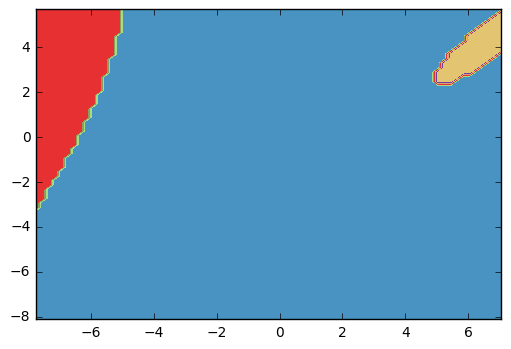

In [96]:
x_min = [x1[0, :].min(), x2[0, :].min(), x3[0, :].min()]
x_max = [x1[0, :].max(), x2[0, :].max(), x3[0, :].max()]
y_min = [x1[1, :].min(), x2[1, :].min(), x3[1, :].min()]
y_max = [x1[1, :].max(), x2[1, :].max(), x3[1, :].max()]

xx, yy = np.meshgrid(np.arange(min(x_min), max(x_max), 0.2), np.arange(min(y_min), max(y_max), 0.2))
Z = np.zeros((xx.shape[0], xx.shape[1]))

for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([[xx[i,j]],[yy[i,j]],[2]])
        Z[i, j] = MAP_Classifier(point, mu, cov, prior)
        
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.show()

In [60]:
print MAP_Classifier(p1, mu, cov, prior)
print MAP_Classifier(p2, mu, cov, prior)
print MAP_Classifier(p3, mu, cov, prior)
print MAP_Classifier(p4, mu, cov, prior)

1
1
1
1


In [102]:
p = [[[1], [2], [1]], [[5], [3], [1]], [[0], [0], [0]], [[1], [0], [0]]]

In [108]:
print p
print p[0][0], p[0][1]

[[[1], [2], [1]], [[5], [3], [1]], [[0], [0], [0]], [[1], [0], [0]]]
[[1], [2], [1]]
